<a href="https://colab.research.google.com/github/camillycastelo/CastleBooks/blob/main/CDAM_Atividade2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados e Aprendizado de Máquina

# Atividade 2 - Classificação - ScikitLearn

## Aplicando os conceitos em dados reais

Nome Completo: Camilly Castelo de Carvalho

RGM: 32106521

Data: 04/11/2025

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [8]:
from sklearn import datasets

digits_dataset = datasets.load_digits()


Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [9]:
digits_img = digits_dataset.images


Verifique o formato de **digits_img**.

In [10]:
digits_img.shape


(1797, 8, 8)

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [11]:
print(digits_img)


[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [12]:
import matplotlib.pyplot as plt


Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

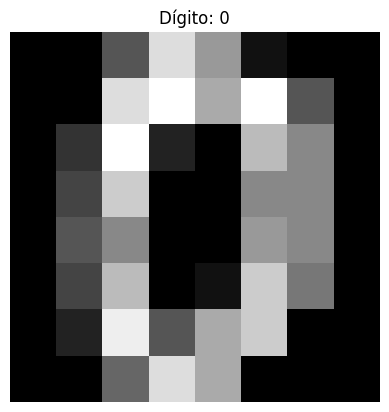

In [13]:
plt.figure()
plt.imshow(digits_img[0], cmap="gray")
plt.title(f"Dígito: {digits_dataset.target[0]}")
plt.axis("off")
plt.show()


Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não foi importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [14]:
import numpy as np

n_amostras = digits_img.shape[0]
digits_flat = digits_img.reshape(n_amostras, -1)

digits_flat.shape


(1797, 64)

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [15]:
n_amostras = digits_img.shape[0]
digits_flat = digits_img.reshape(n_amostras, 64)

digits_flat.shape


(1797, 64)

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [16]:
# Verificações do novo formato
print("Formato original:", digits_img.shape)   # (n_amostras, 8, 8)
print("Novo formato:", digits_flat.shape)      # (n_amostras, 64)

# Checar consistência do número total de pixels
pixels_orig = digits_img.size
pixels_novo = digits_flat.size
print("Pixels originais:", pixels_orig, "| Pixels no novo formato:", pixels_novo)


Formato original: (1797, 8, 8)
Novo formato: (1797, 64)
Pixels originais: 115008 | Pixels no novo formato: 115008


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [17]:
digits_target = digits_dataset.target


Imprima **digits_target** para visualizar como são esses dados

In [18]:
print(digits_target)


[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [19]:
digits_target.shape


(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [20]:
from sklearn.model_selection import train_test_split


Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [25]:
X = digits_flat
y = digits_target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,
    random_state=42,
    stratify=y
)


Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [27]:
X_train.shape

(1347, 64)

In [28]:
X_test.shape

(450, 64)

In [29]:
y_train.shape

(1347,)

In [30]:
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [31]:
from sklearn.neighbors import KNeighborsClassifier


Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)


Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [33]:
knn = knn.fit(X_train, y_train)


#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [34]:
y_pred = knn.predict(X_test)


#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix


Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [36]:
acc = accuracy_score(y_test, y_pred)
acc


0.9844444444444445

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 43]])

### Decision Tree

#### Treinamento

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)


Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [39]:
dt = dt.fit(X_train, y_train)


#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [40]:
y_pred = dt.predict(X_test)


#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [41]:
acc_dt = accuracy_score(y_test, y_pred)
acc_dt


0.8244444444444444

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [42]:
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt


array([[41,  0,  0,  0,  3,  0,  0,  0,  1,  0],
       [ 0, 35,  4,  2,  0,  1,  3,  0,  1,  0],
       [ 0,  0, 33,  2,  1,  0,  0,  3,  4,  1],
       [ 0,  0,  2, 41,  0,  0,  0,  0,  0,  3],
       [ 1,  2,  0,  0, 39,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  2, 41,  0,  0,  0,  3],
       [ 0,  0,  1,  0,  3,  1, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1, 39,  2,  2],
       [ 0,  5,  0,  1,  0,  3,  1,  2, 28,  3],
       [ 2,  2,  0,  2,  2,  0,  0,  2,  1, 34]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

Acurácia é a porcentagem de acertos do modelo (acertos ÷ total).
Não é suficiente sozinha, porque em dados desbalanceados ela pode enganar.
Eu olho também a matriz de confusão, a precision, o recall e o F1 pra entender melhor onde o modelo acerta e erra.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

Mostra, pra cada classe, quantos acertos e quantos erros o modelo cometeu.
Na diagonal ficam os acertos por class, fora da diagonal estão as confusões.
Com isso dá pra ver onde o modelo erra mais e calcular precision, recall e F1 por classe.




### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

- Linhas: as classes reais (o que de fato era).
- Colunas: as classes preditas pelo modelo.
- Diagonal principal: onde bate real com predito — são os acertos (verdadeiros positivos de cada classe).
- Fora da diagonal: erros de classificação (uma classe confundida com outra).



### 4. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Para escolher o número de vizinhos `k` no KNN, eu primeiro padronizo as variáveis, porque o algoritmo depende de distâncias. Em seguida, faço uma validação sistemática: testo vários valores de `k` (geralmente ímpares, entre 1 e 25) usando validação cruzada e fico com aquele que apresenta o melhor desempenho médio (acurácia ou, quando há desbalanceamento entre classes, F1 (macro)). Costumo começar a busca perto de `k ≈ √N` apenas como ponto de partida e deixo os dados indicarem o ajuste final. O `k` muito pequeno tende a “memorizar” o ruído do conjunto de treino (overfitting), enquanto `k` muito grande suaviza demais as fronteiras de decisão e perde detalhes importantes (underfitting). Quando necessário, também avalio a opção de ponderar pelos vizinhos mais próximos (`weights="distance"`), que pode melhorar casos em que exemplos mais próximos deveriam ter mais influência na decisão.


### 5. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O KNN e Decision Tree ficaram com ~98,44% de acurácia e matrizes de confusão praticamente iguais.

Em outra base de dígitos, não é garantido que o melhor continue sendo o mesmo. Isso depende de como são os dados.
O KNN é sensível à distância/escala e à densidade local.
A Árvore de Decisão cria regras e pode overfitar se os padrões mudarem.

Por isso, em cada base é preciso validar e ajustar antes de decidir o vencedor.


## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)